In [1]:
from pyabc import History
import pandas as pd
from ionchannelABC.utils import weighted_cv
from pyabc.weighted_statistics import weighted_mean
import seaborn as sns
import matplotlib.pyplot as plt

INFO:myokit:Loading Myokit version 1.28.3


In [2]:
history_nygren = History('sqlite:///'+
                         '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/nygren/reported/nygren_ina_reported.db')

In [3]:
history_nygren_full = History('sqlite:///'+
                              '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/nygren/full/nygren_ina_full.db')

In [4]:
history_cou_m = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/reported/courtemanche_mgate_reported.db')
history_cou_h = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/reported/courtemanche_hgate_reported.db')
history_cou_j = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/reported/courtemanche_jgate_reported.db')

In [5]:
history_cou_m_full = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/full/courtemanche_mgate_full.db')
history_cou_h_full = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/full/courtemanche_hgate_full.db')
history_cou_j_full = History('sqlite:///'+
                        '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/courtemanche/full/courtemanche_jgate_full.db')

In [22]:
history_cou_j_full.id = 2

In [23]:
df_nyg, w_nyg = history_nygren.get_distribution()

In [24]:
cv_nyg = weighted_cv(df_nyg, w_nyg, sample_size=2000)

In [25]:
model = ['NYG',]*len(cv_nyg)
data = ['ORIGINAL',]*len(cv_nyg)
frame = {'model': model, 'data': data, 'CV': cv_nyg}
df_nyg = pd.DataFrame(frame)

In [26]:
df_nyg_full, w_nyg_full = history_nygren_full.get_distribution()
cv_nyg_new = weighted_cv(df_nyg_full, w_nyg_full, sample_size=2000)
model = ['NYG',]*len(cv_nyg_new)
data = ['FULL',]*len(cv_nyg_new)
frame = {'model': model, 'data': data, 'CV': cv_nyg_new}
df_nyg_new = pd.DataFrame(frame)

In [27]:
df_cou_m, w_m = history_cou_m.get_distribution()
df_cou_h, w_h = history_cou_h.get_distribution()
df_cou_j, w_j = history_cou_j.get_distribution()

In [28]:
cv_cou_m = weighted_cv(df_cou_m, w_m, sample_size=500)
cv_cou_h = weighted_cv(df_cou_h, w_h, sample_size=1000)
cv_cou_j = weighted_cv(df_cou_j, w_j, sample_size=2000)

cv_cou = pd.concat([cv_cou_m, cv_cou_h, cv_cou_j])
model = ['COU',]*len(cv_cou)
data = ['ORIGINAL',]*len(cv_cou)

In [29]:
frame = {'model': model, 'data': data, 'CV': cv_cou}
df_cou = pd.DataFrame(frame)

In [30]:
df_cou_m_full, w_m_full = history_cou_m_full.get_distribution()
df_cou_h_full, w_h_full = history_cou_h_full.get_distribution()
df_cou_j_full, w_j_full = history_cou_j_full.get_distribution()

In [31]:
cv_cou_m_full = weighted_cv(df_cou_m_full, w_m_full, sample_size=500)
cv_cou_h_full = weighted_cv(df_cou_h_full, w_h_full, sample_size=1000)
cv_cou_j_full = weighted_cv(df_cou_j_full, w_j_full, sample_size=2000)

cv_cou_full = pd.concat([cv_cou_m_full, cv_cou_h_full, cv_cou_j_full])
model = ['COU',]*len(cv_cou_full)
data = ['FULL',]*len(cv_cou_full)

In [32]:
frame = {'model': model, 'data': data, 'CV': cv_cou_full}
df_cou_new = pd.DataFrame(frame)

In [33]:
old_vs_new = pd.concat([df_nyg,df_nyg_new,df_cou,df_cou_new])

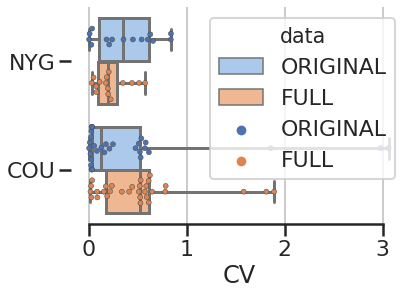

In [34]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 4))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', hue='data', data=old_vs_new,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', hue='data', data=old_vs_new,
              dodge=True, linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [97]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/add_data_compare_cv.pdf')

In [35]:
import scipy.stats as ss
diff = df_nyg.CV-df_nyg_new.CV
ss.wilcoxon(diff)

WilcoxonResult(statistic=30.0, pvalue=0.08840247992639415)

In [36]:
import scipy.stats as ss
diff = df_cou.CV-df_cou_new.CV
ss.wilcoxon(diff)

WilcoxonResult(statistic=82.0, pvalue=0.0303106981372454)

In [37]:
eps_cou_m = history_cou_m.get_weighted_distances()
eps_cou_h = history_cou_h.get_weighted_distances()
eps_cou_j = history_cou_j.get_weighted_distances()

In [38]:
df = pd.concat([df_nyg, df_cou])

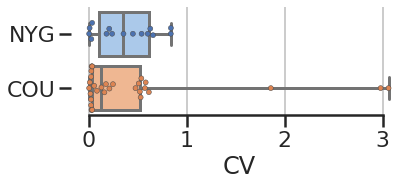

In [39]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 2))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [40]:
ss.mannwhitneyu(df[df.model=='NYG'].CV, df[df.model=='COU'].CV)

MannwhitneyuResult(statistic=188.0, pvalue=0.1512652728831716)

In [41]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/original_cv.pdf')

## Standardised model

In [48]:
history_sta = History('sqlite:///'+
                      '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/standardised/standardised_ina_full.db')

In [49]:
df_sta, w_sta = history_sta.get_distribution()

In [50]:
eps_sta = history_sta.get_weighted_distances()

In [51]:
weighted_mean(eps_sta.distance, eps_sta.w)

1.1960048022930154

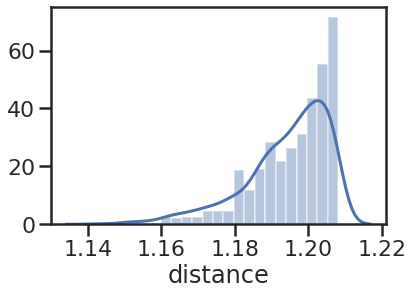

In [52]:
sns.distplot(eps_sta.distance, hist_kws={'weights': eps_sta.w})

In [53]:
cv_sta = weighted_cv(df_sta, w_sta, sample_size=2000)

In [54]:
model = ['STA',]*len(cv_sta)
frame = {'model': model, 'CV': cv_sta}
df_sta = pd.DataFrame(frame)

In [55]:
df = pd.concat([df_nyg_new,df_cou,df_sta])

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


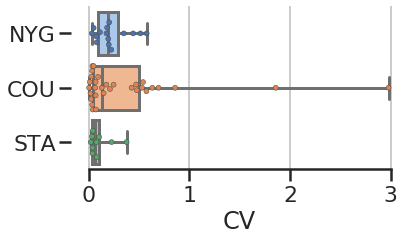

In [56]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [57]:
ss.mannwhitneyu(df[df.model=='NYG'].CV, df[df.model=='STA'].CV)

MannwhitneyuResult(statistic=38.0, pvalue=0.021451364408290676)

In [58]:
ss.mannwhitneyu(df[df.model=='COU'].CV, df[df.model=='STA'].CV)

MannwhitneyuResult(statistic=114.0, pvalue=0.10943603522308648)

In [59]:
ss.mannwhitneyu(df[df.model=='NYG'].CV, df[df.model=='COU'].CV)

MannwhitneyuResult(statistic=208.0, pvalue=0.28693007440644425)

In [60]:
#f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/compare_cv_full.pdf')

### Plot epsilon comparison

In [61]:
# Create virtual COU epsilon dataset by summing
import numpy as np
eps_cou = np.array([])
eps_cou = (np.array(eps_cou_m.sample(n=2000,axis=0,weights=eps_cou_m.w,replace=True).distance) +
           np.array(eps_cou_h.sample(n=2000,axis=0,weights=eps_cou_h.w,replace=True).distance) +
           np.array(eps_cou_j.sample(n=2000,axis=0,weights=eps_cou_j.w,replace=True).distance))

In [62]:
frame = {'model': 'COU', 'distance': eps_cou}
eps_cou = pd.DataFrame(frame)

In [63]:
eps_nyg = eps_nyg_full.sample(n=2000,axis=0,weights=eps_nyg_full.w,replace=True).distance
eps_nyg = pd.DataFrame({'model': 'NYG', 'distance': eps_nyg})

In [64]:
eps_sta = eps_sta.sample(n=2000,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'STA', 'distance': eps_sta})

In [65]:
eps = pd.concat([eps_nyg,eps_cou,eps_sta])

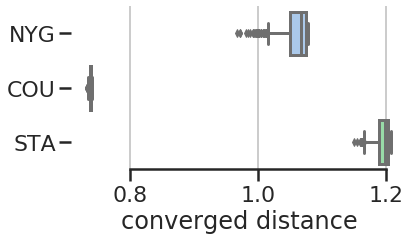

In [66]:
f, ax = plt.subplots(figsize=(6,3))

sns.boxplot(x="distance", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="converged distance")
sns.despine(trim=True, left=True)

In [67]:
#f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/compare_eps.pdf')

In [68]:
df_nyg, w_nyg = history_nygren_full.get_distribution()
df_cou_m, w_cou_m = history_cou_m_full.get_distribution()
df_cou_h, w_cou_h = history_cou_h_full.get_distribution()
df_cou_j, w_cou_j = history_cou_j_full.get_distribution()
df_sta, w_sta = history_sta.get_distribution()

In [69]:
from ionchannelABC.visualization import plot_sim_results

In [70]:
from experiments.ina_sakakibara import (sakakibara_act,
                                        sakakibara_inact_kin_fast,
                                        sakakibara_inact_kin_slow,
                                        sakakibara_rec_fast,
                                        sakakibara_rec_slow)
from experiments.ina_schneider import (schneider_taum,
                                       schneider_taus,
                                       schneider_inact)

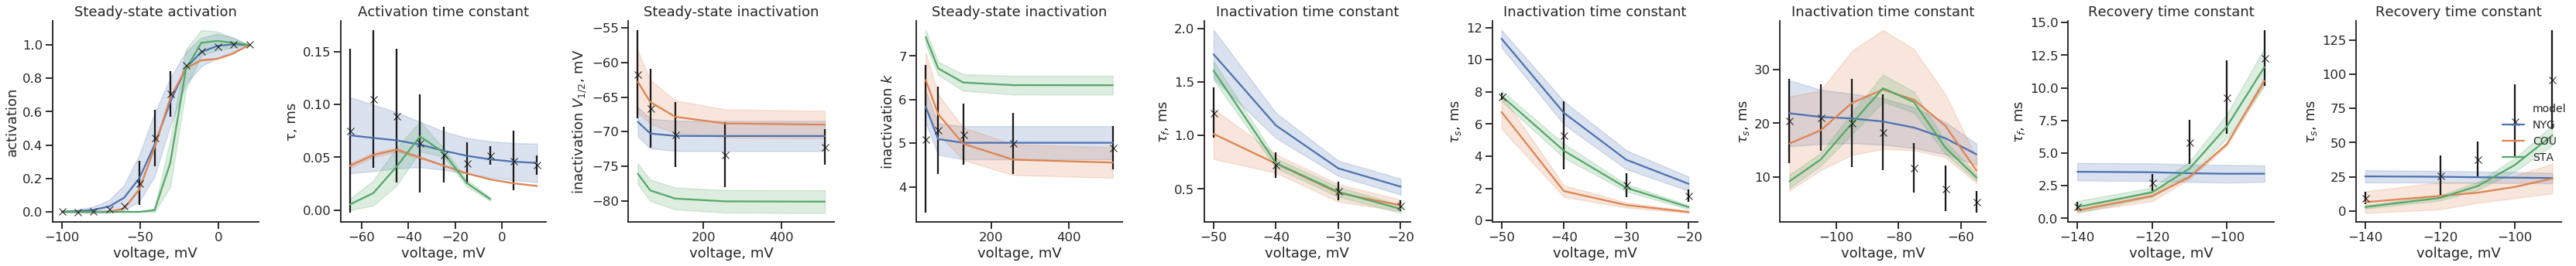

In [74]:
import seaborn as sns
import matplotlib as mpl
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/courtemanche_ina.mmt',
                      'models/standardised_ina.mmt'],
                     sakakibara_act,
                     schneider_taum,
                     schneider_inact,
                     sakakibara_inact_kin_fast,
                     sakakibara_inact_kin_slow,
                     schneider_taus,
                     sakakibara_rec_fast,
                     sakakibara_rec_slow,
                     masks=[None,
                            [0,1]+[None,]*6,
                            [None,]*2+[(2,3),4,None,None,7,None],
                            [None,]*4+[5,6,None,8],
                            None],
                     df=[df_nyg_full,
                         df_cou_m,
                         df_cou_h,
                         df_cou_j,
                         df_sta], 
                     w=[w_nyg_full,
                        w_cou_m,
                        w_cou_h,
                        w_cou_j,
                        w_sta])

xlabels = ["voltage, mV"]*9
ylabels = ["activation", "τ, ms", "inactivation $V_{1/2}$, mV", "inactivation $k$",
           "$τ_f$, ms", "$τ_s$, ms", "$τ_s$, ms", "$τ_f$, ms", "$τ_s$, ms"]
titles = ["Steady-state activation", "Activation time constant", "Steady-state inactivation",
          "Steady-state inactivation", "Inactivation time constant", "Inactivation time constant",
          "Inactivation time constant", "Recovery time constant", "Recovery time constant"]
for ax, xl in zip(g.axes.flatten(), xlabels):
    ax.set_xlabel(xl)
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax, t in zip(g.axes.flatten(), titles):
    ax.set_title(t)

plt.tight_layout()

In [75]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/compare_out.pdf')